In [0]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [67]:
# Load the letter recognition dataset.
# The dataset can be downloaded here: http://archive.ics.uci.edu/ml/datasets/Letter+Recognition.
%%time
letters = pd.read_csv("./drive/My Drive/ML_Code/Letter Recognition/letter-recognition.csv")

CPU times: user 55.1 ms, sys: 4 ms, total: 59.1 ms
Wall time: 64.1 ms


In [68]:
letters.shape

(20000, 17)

In [69]:
print(letters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [70]:
letters.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [71]:
# Oder letters.
order = list(np.sort(letters['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [0]:
#plt.figure(figsize=(16, 8))
#sns.barplot(x='letter', y='xbox', data=letters, order=order)

In [73]:
# Group By then average them.
letter_means = letters.groupby('letter').mean()
letter_means.head(10)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510
F,3.832258,7.009032,4.898065,5.209032,3.178065,4.913548,10.454194,3.476129,4.886452,11.242581,7.830968,5.723871,1.736774,9.117419,3.321290,6.712258
G,4.086675,6.988357,4.988357,5.282018,3.566624,6.866753,6.586028,5.966365,5.337646,7.429495,6.157827,9.586028,2.833118,8.369987,5.146184,9.216041
H,4.331063,6.844687,5.784741,5.193460,4.253406,7.344687,7.320163,6.702997,4.280654,8.044959,5.899183,7.801090,3.862398,8.047684,3.095368,7.858311
I,2.270199,6.980132,2.631788,5.209272,1.825166,7.458278,7.035762,1.940397,5.973510,9.476821,5.797351,7.649007,0.537748,8.066225,2.141722,7.931126


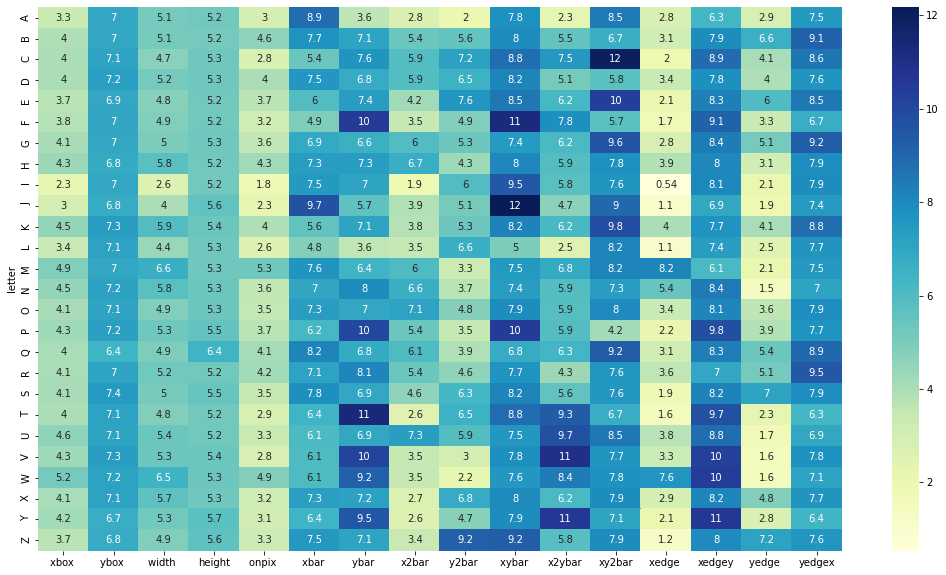

In [74]:
# Plot correlations on a heatmap.
plt.figure(figsize=(18, 10))
sns.heatmap(letter_means, cmap="YlGnBu", annot=True)
plt.show()

In [75]:
# Average of feature values.
round(letters.drop('letter', axis=1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [0]:
# Split a dataset into X and y.
X = letters.drop("letter", axis=1)
y = letters['letter']

In [0]:
# Scale the features. Standardize a dataset.
X_scaled = scale(X)

# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

### **Linear Regression Model**

In [0]:
# Linear SVM model.
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

In [79]:
# Print accuracy.
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

Accuracy: 0.8596666666666667 



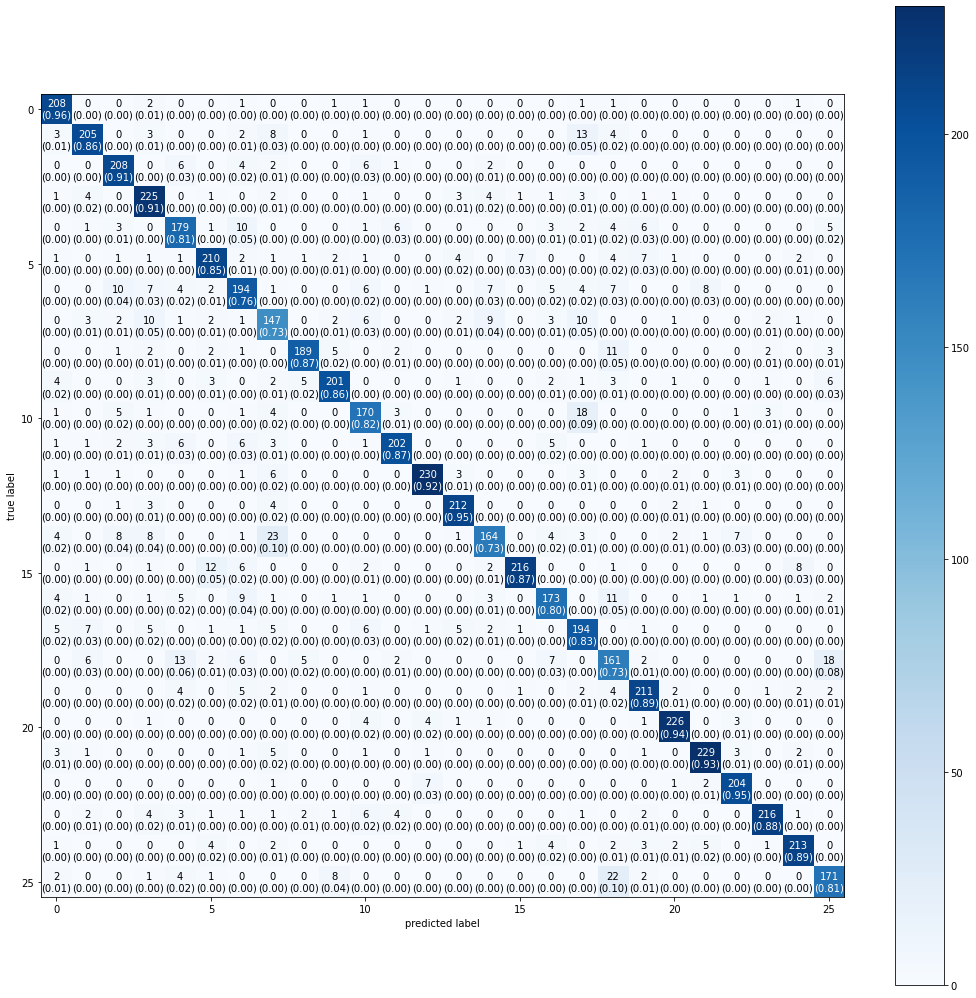

CPU times: user 2.46 s, sys: 222 ms, total: 2.68 s
Wall time: 2.69 s


In [80]:
# Plot the confusion matrix.
%%time
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(18,18))
plt.show()

### **Non-linear Regression Model**

In [0]:
# Non-linear regression model using RBF SVM kernel, C=1, default value of gamma.
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)
y_pred = non_linear_model.predict(X_test)

In [82]:
# Print accuracy.
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

Accuracy: 0.945 



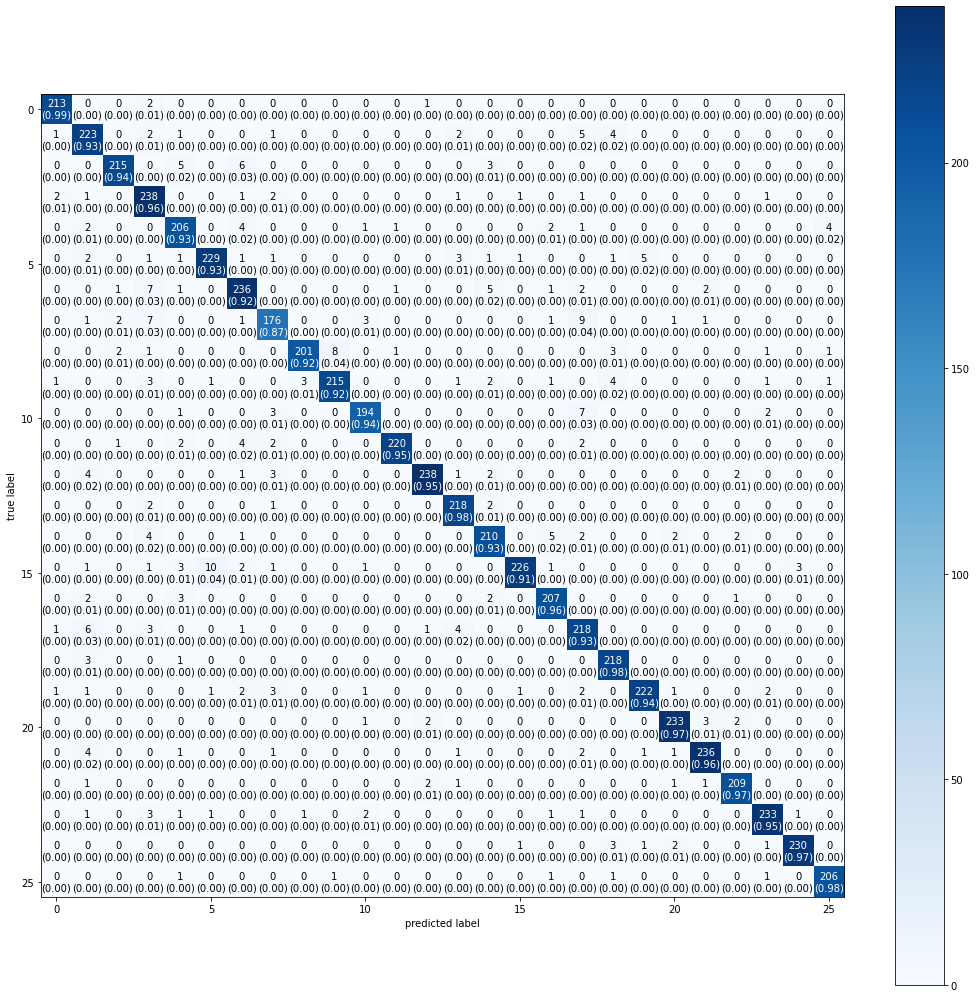

CPU times: user 2.27 s, sys: 178 ms, total: 2.45 s
Wall time: 2.44 s


In [83]:
# Plot the confusion matrix.
%%time
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(18,18))
plt.show()

### **Hyperparameter Tuning using Grid Search**

In [84]:
# Create a KFold object with 10 splits.
folds = KFold(n_splits=10, shuffle=True, random_state=0)

# Specify range of hyperparameters.
# Set the parameters by cross-validation
hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]

# Non-linear regression model using RBF SVM kernel.
model = SVC(kernel="rbf")

# Set up GridSearchCV() funcion.
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Fit the model.
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 28.2min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [85]:
# Cross-Validation results.
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,3.826758,0.024982,1.030907,0.002848,1,0.01,"{'C': 1, 'gamma': 0.01}",0.835714,0.837857,0.837857,0.850000,0.845000,0.823571,0.847143,0.821429,0.845714,0.849286,0.839357,0.009660,7,0.851270,0.847540,0.849444,0.847302,0.847937,0.852937,0.847143,0.852698,0.847460,0.847778,0.849151,0.002185
1,8.323881,0.023155,1.311605,0.003222,1,0.001,"{'C': 1, 'gamma': 0.001}",0.689286,0.682143,0.709286,0.720714,0.692857,0.675714,0.688571,0.670714,0.695000,0.696429,0.692071,0.014097,10,0.695952,0.697302,0.691429,0.694286,0.692460,0.698333,0.695159,0.698095,0.695714,0.693095,0.695183,0.002246
2,16.462751,0.023183,1.387610,0.004848,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.277857,0.269286,0.251429,0.262143,0.251429,0.265714,0.278571,0.249286,0.298571,0.247143,0.265143,0.015613,12,0.286587,0.289127,0.249762,0.262143,0.272381,0.288175,0.289127,0.270238,0.285873,0.268016,0.276143,0.013010
3,2.289549,0.014498,0.700816,0.004636,10,0.01,"{'C': 10, 'gamma': 0.01}",0.903571,0.908571,0.917143,0.912143,0.922857,0.918571,0.917857,0.892857,0.917857,0.921429,0.913286,0.008819,3,0.930635,0.933016,0.931270,0.931190,0.930873,0.930794,0.932302,0.932540,0.931429,0.930873,0.931492,0.000788
4,3.807410,0.020329,1.038793,0.003405,10,0.001,"{'C': 10, 'gamma': 0.001}",0.803571,0.817143,0.822143,0.820714,0.827857,0.798571,0.822857,0.791429,0.818571,0.825714,0.814857,0.011827,8,0.822778,0.821825,0.823968,0.822222,0.820873,0.826429,0.821905,0.824762,0.821984,0.822937,0.822968,0.001568
5,8.285788,0.027905,1.310622,0.004746,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.690000,0.680000,0.706429,0.718571,0.692143,0.676429,0.687143,0.667143,0.693571,0.694286,0.690571,0.013905,11,0.695794,0.696905,0.691587,0.693413,0.691270,0.697063,0.695397,0.697540,0.695159,0.692460,0.694659,0.002203
6,2.469532,0.020849,0.514992,0.002824,100,0.01,"{'C': 100, 'gamma': 0.01}",0.935000,0.933571,0.952143,0.948571,0.954286,0.944286,0.948571,0.940714,0.951429,0.949286,0.945786,0.006825,2,0.979048,0.978889,0.978730,0.978571,0.977143,0.978413,0.978175,0.978730,0.977619,0.978968,0.978429,0.000588
7,2.631303,0.013108,0.738930,0.003693,100,0.001,"{'C': 100, 'gamma': 0.001}",0.850000,0.855000,0.857857,0.865000,0.879286,0.857143,0.872857,0.837143,0.860714,0.873571,0.860857,0.011831,5,0.878968,0.876508,0.878095,0.875397,0.874683,0.876429,0.876508,0.879286,0.876429,0.876349,0.876865,0.001401
8,3.849465,0.014264,1.038261,0.002105,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.797143,0.811429,0.818571,0.817143,0.819286,0.788571,0.813571,0.785714,0.817857,0.820000,0.808929,0.012610,9,0.818651,0.816984,0.818571,0.816190,0.815317,0.820794,0.816032,0.820000,0.816667,0.817619,0.817683,0.001698
9,2.753596,0.026589,0.469218,0.006515,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.949286,0.950714,0.957143,0.957143,0.961429,0.946429,0.952857,0.947857,0.953571,0.956429,0.953286,0.004531,1,0.997302,0.996587,0.996746,0.996746,0.996667,0.997302,0.996667,0.996746,0.997143,0.996746,0.996865,0.000259


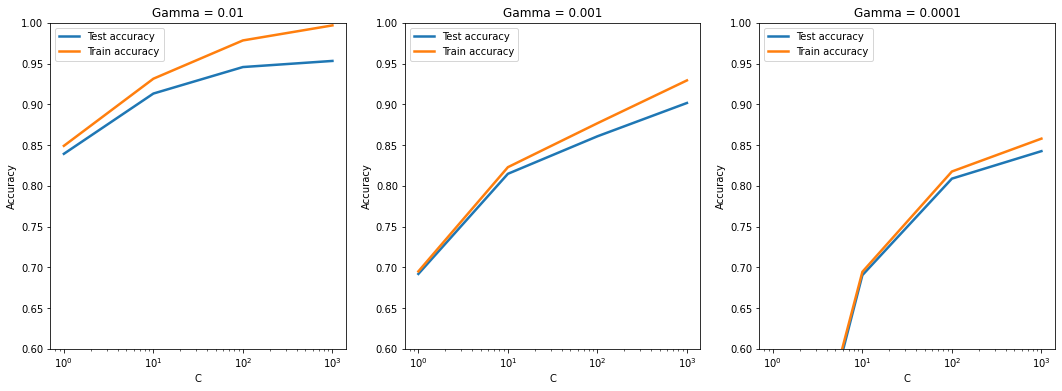

In [86]:
# Convert C to numeric type for plotting on x-axis.
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(18,6))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"], linewidth=2.5)
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"], linewidth=2.5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.01")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"], linewidth=2.5)
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"], linewidth=2.5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.001")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"], linewidth=2.5)
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"], linewidth=2.5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.0001")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'], loc='upper left')
plt.xscale('log')

In [87]:
# Print the optimal accuracy score and hyperparameters.
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best accuracy is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best accuracy is 0.9532857142857143 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [88]:
# Non-linear regression model using RBF SVM kernel with the optimal hyperparameters.
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print accuracy.
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.9586666666666667 



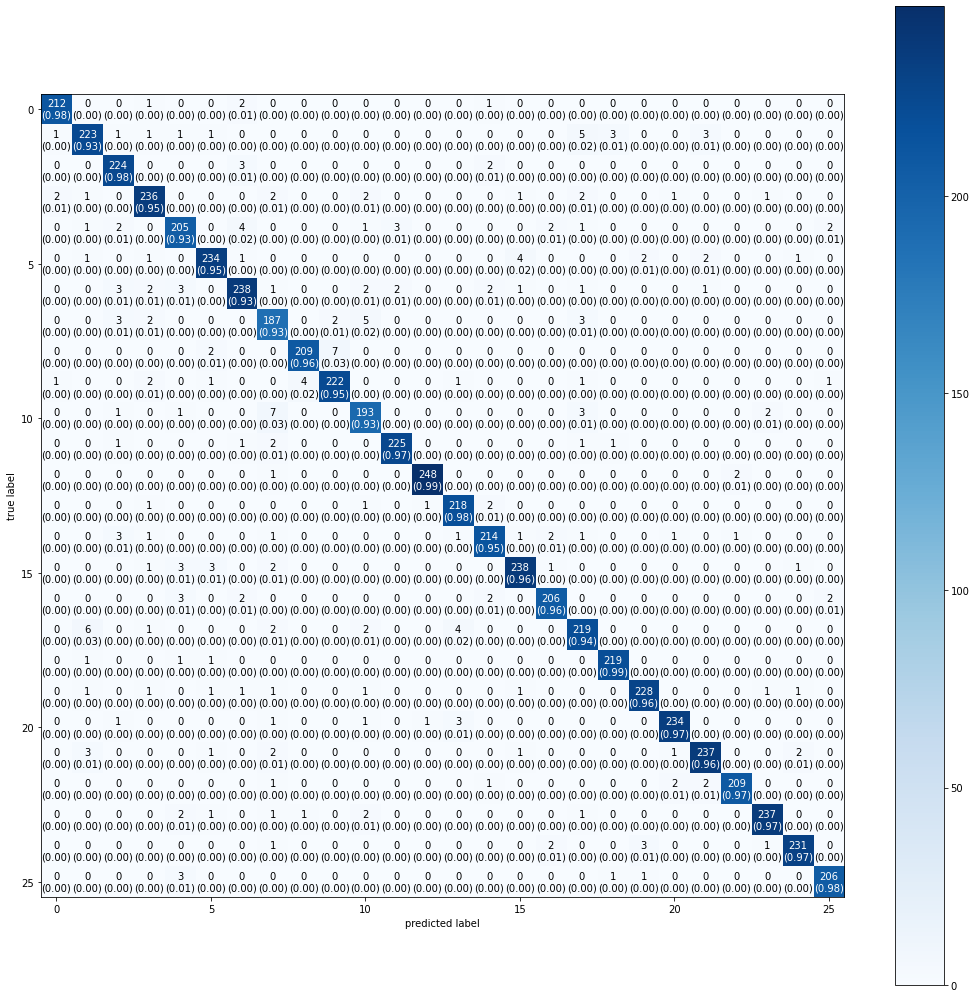

CPU times: user 2.23 s, sys: 183 ms, total: 2.41 s
Wall time: 2.42 s


In [89]:
# Plot the confusion matrix.
%%time
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(18,18))
plt.show()